In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import statsmodels.api
import matplotlib.pyplot as plt

In [2]:
mtc=pd.read_csv('C:/Users/sungyoon/Desktop/mtcarsDataset.csv')

In [3]:
mtc.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
X1=mtc.drop('Unnamed: 0',axis=1)

In [10]:
result=sm.ols(formula='mpg ~ cyl + disp + hp + drat + wt + qsec + vs + am + gear + carb',data=X1).fit()

In [6]:
X2=X1.drop('mpg',axis=1)
X2.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
rst=statsmodels.api.OLS(X1.mpg,X2).fit()
rst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              203.0
Date:                Mon, 11 Nov 2019   Prob (F-statistic):                    2.82e-19
Time:                        10:38:54   Log-Likelihood:                         -70.181
No. Observations:                  32   AIC:                                      160.4
Df Residuals:                      22   BIC:                                      175.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl            0.3508      0.763      0.460      0.650      -1.231       1.933
disp           0.0135      0.018      0.768      0.450      -0.023       0.050
hp            -0.0205      0.021     -0.958      0.348      -0.065       0.024
drat           1.2416      1.463      0.849      0.405      -1.792       4.275
wt            -3.8261      1.862     -2.054      0.052      -7.688       0.036
qsec           1.1914      0.459      2.593      0.017       0.239       2.144
vs             0.1897      2.068      0.092      0.928      -4.100       4.479
am             2.8322      1.975      1.434      0.166      -1.264       6.928
gear           1.0543      1.347      0.783      0.442      -1.739       3.847
carb          -0.2632      0.812     -0.324      0.749      -1.948       1.422
==============================================================================
Omnibus:                        1.401   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.317
Skew:                           0.386   Prob(JB):                        0.518
Kurtosis:                       2.375   Cond. No.                     1.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
lm=LinearRegression()
lm.fit(X2,X1.mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))


Estimated intercept coefficient: 12.30337415599627
Number of coefficients: 10


In [12]:
result1=lm.predict(X2)

Text(0, 0.5, 'predicted mpg')

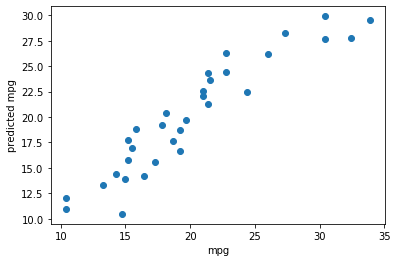

In [13]:
plt.scatter(X1.mpg,lm.predict(X2))
plt.xlabel('mpg')
plt.ylabel('predicted mpg')

C:\Users\sungyoon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


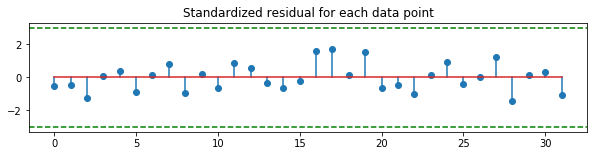

In [14]:
#표준화 잔차 확인 (아웃라이어 확인을 위해)

plt.figure(figsize=(10,2))
plt.stem(rst.resid_pearson)
plt.axhline(3,c="g",ls="--")
plt.axhline(-3,c="g",ls="--")
plt.title("Standardized residual for each data point")
plt.show()